PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path="/content/drive/MyDrive/forestfires.csv"
forestfires_data=pd.read_csv(path)
forestfires_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


**Initial Investigation**

In [ ]:
forestfires_data.shape

(517, 31)

In [ ]:
forestfires_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
forestfires_data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

**Data Visualization**

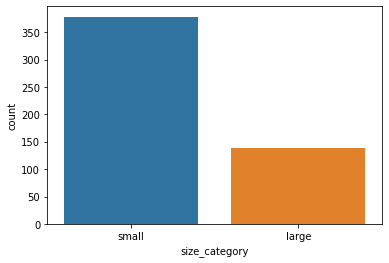

In [ ]:
sns.countplot(x='size_category',data =forestfires_data)

Text(0, 0.5, 'temp')

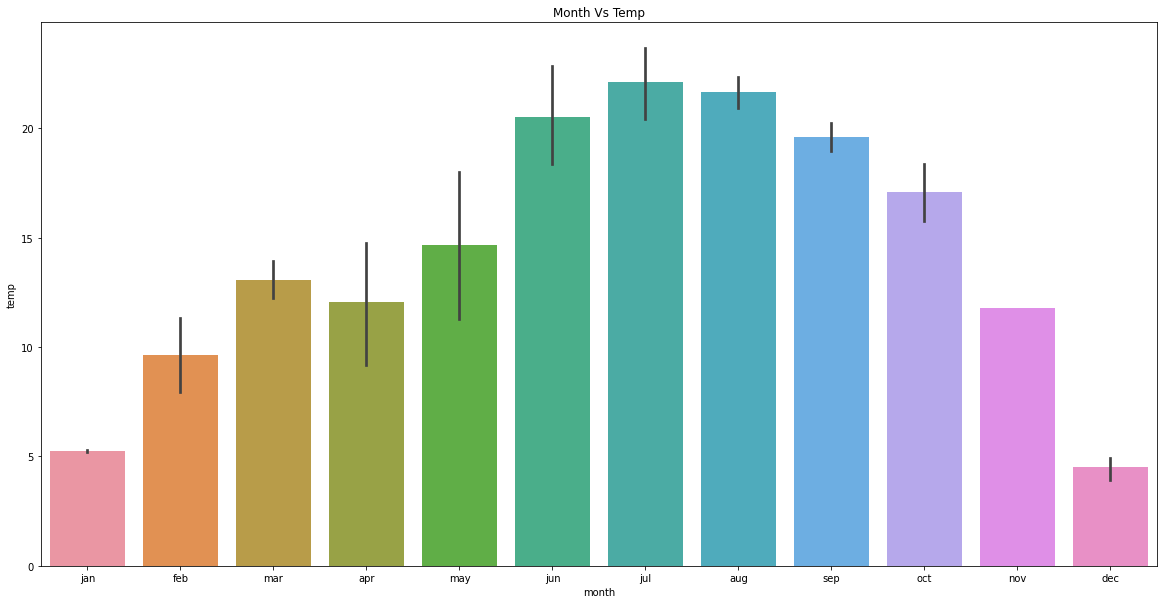

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='month',y='temp',data=forestfires_data,
            order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.title('Month Vs Temp')
plt.xlabel('month')
plt.ylabel('temp')

Text(0.5, 1.0, 'Countplot for weekdays')

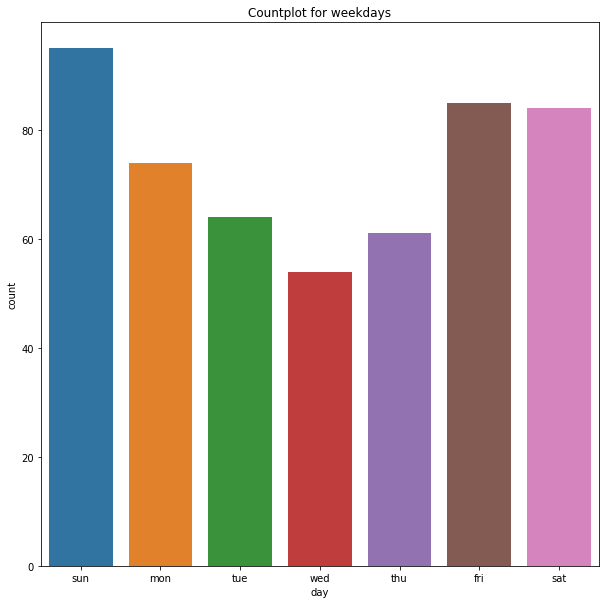

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='day',data=forestfires_data,
              order=['sun','mon','tue','wed','thu','fri','sat'])
plt.title('Countplot for weekdays')

**Data Preprocessing**

In [ ]:
#Dropping columns which are not required
forestfires_data=forestfires_data.drop(columns=['dayfri','daymon','daysat','daysun','daythu','daytue','daywed','monthapr',	
                               'monthaug','monthdec','monthfeb','monthjan','monthjul','monthjun','monthmar',
                               'monthmay','monthnov','monthoct','monthsep'],axis=1)

In [ ]:
forestfires_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


Text(0.5, 1.0, 'HeatMap of Features for the Classes')

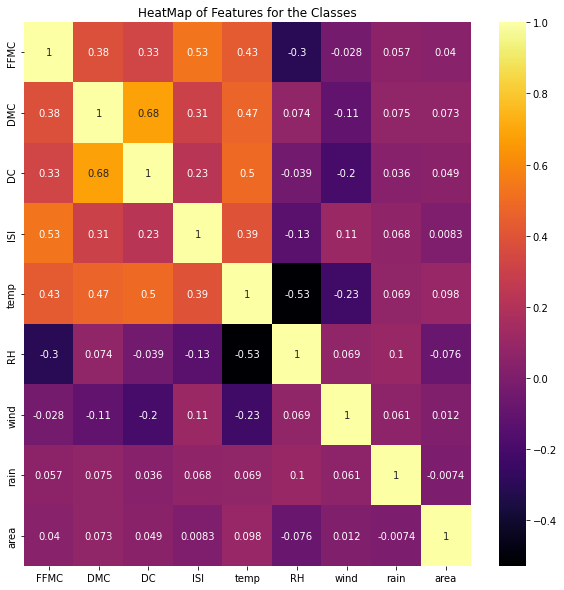

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(forestfires_data.corr(),annot=True,cmap="inferno")
plt.title("HeatMap of Features for the Classes")

In [ ]:
forestfires_data["month"].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [ ]:
month_data={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
forestfires_data.replace(month_data,inplace=True)

In [ ]:
forestfires_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,3,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,3,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,8,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,8,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,8,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [ ]:
forestfires_data["day"].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [ ]:
day_data={'day':{'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7}}
forestfires_data.replace(day_data,inplace=True)

In [ ]:
forestfires_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [ ]:
forestfires_data['size_category'].unique()

array(['small', 'large'], dtype=object)

In [ ]:
forestfires_data.size_category.replace(('small','large'),(1,0),inplace=True)

In [ ]:
forestfires_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


In [ ]:
X=forestfires_data.iloc[:,0:11]
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
Y=forestfires_data["size_category"]
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [ ]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)
x_scaled

array([[-1.96844301,  0.35772091, -0.80595947, ...,  1.49861442,
        -0.07326831, -0.20201979],
       [ 1.1101202 , -1.09090867, -0.00810203, ..., -1.74175564,
        -0.07326831, -0.20201979],
       [ 1.1101202 ,  0.84059743, -0.00810203, ..., -1.51828184,
        -0.07326831, -0.20201979],
       ...,
       [ 0.23053071,  1.32347396, -1.64008316, ...,  1.49861442,
        -0.07326831, -0.02653216],
       [ 0.23053071,  0.84059743,  0.68095666, ..., -0.00983371,
        -0.07326831, -0.20201979],
       [ 1.54991494, -1.09090867, -2.02087875, ...,  0.26950853,
        -0.07326831, -0.20201979]])

In [ ]:
scaled_forestfires_data=pd.DataFrame(x_scaled,columns=X.columns)
scaled_forestfires_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...
512,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,0.230531,0.840597,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


In [ ]:
X_transformed=scaled_forestfires_data
X_transformed

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...
512,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,0.230531,0.840597,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


In [ ]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

**Model Building**

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_transformed,Y,test_size=0.20,random_state=123)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(413, 11)
(104, 11)
(413,)
(104,)


**Model Training**

In [ ]:
model=Sequential()
model.add(Dense(units=12,input_dim=11,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=10,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train, epochs=100, batch_size=10)

Epoch 1/100
42/42 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.7264
Epoch 2/100
42/42 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.7361
Epoch 3/100
42/42 [==============================] - 0s 2ms/step - loss: 0.6224 - accuracy: 0.7361
Epoch 4/100
42/42 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.7361
Epoch 5/100
42/42 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.7409
Epoch 6/100
42/42 [==============================] - 0s 2ms/step - loss: 0.5016 - accuracy: 0.7458
Epoch 7/100
42/42 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.7676
Epoch 8/100
42/42 [==============================] - 0s 2ms/step - loss: 0.4606 - accuracy: 0.7893
Epoch 9/100
42/42 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0.8063
Epoch 10/100
42/42 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8111
Epoch 11/

**Model Evaluation**

In [ ]:
scores = model.evaluate(X_test,Y_test)
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

4/4 [==============================] - 0s 3ms/step - loss: 0.0614 - accuracy: 0.9808
accuracy: 98.08%
